In [2]:
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import os

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            PATH = os.path.join('logs', NAME)
            tensorboard = TensorBoard(log_dir=PATH)

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
            
            IMG_SIZE = 50

            X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

            y = np.array(y)

            history= model.fit(X, y,
                      batch_size=32,
                      epochs=5,
                      validation_split=0.3,
                      callbacks=[tensorboard])
model.save('64x3-CNN.model')


1-conv-32-nodes-0-dense-1592666134
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 4s 3ms/sample - loss: 0.3524 - accuracy: 0.8493 - val_loss: 0.1454 - val_accuracy: 0.9579
Epoch 2/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.1424 - accuracy: 0.9457 - val_loss: 0.1007 - val_accuracy: 0.9688
Epoch 3/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.1060 - accuracy: 0.9598 - val_loss: 0.1521 - val_accuracy: 0.9329
Epoch 4/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.1073 - accuracy: 0.9612 - val_loss: 0.0793 - val_accuracy: 0.9688
Epoch 5/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0677 - accuracy: 0.9759 - val_loss: 0.0617 - val_accuracy: 0.9828
2-conv-32-nodes-0-dense-1592666151
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 6s 4ms/sample - loss: 0.4358 - accuracy: 0.7870 - val_lo

Epoch 1/5
1493/1493 [==============================] - 6s 4ms/sample - loss: 0.2457 - accuracy: 0.8969 - val_loss: 0.1036 - val_accuracy: 0.9672
Epoch 2/5
1493/1493 [==============================] - 4s 3ms/sample - loss: 0.1211 - accuracy: 0.9524 - val_loss: 0.0754 - val_accuracy: 0.9719
Epoch 3/5
1493/1493 [==============================] - 4s 3ms/sample - loss: 0.1091 - accuracy: 0.9578 - val_loss: 0.0749 - val_accuracy: 0.9704
Epoch 4/5
1493/1493 [==============================] - 4s 3ms/sample - loss: 0.0675 - accuracy: 0.9759 - val_loss: 0.0646 - val_accuracy: 0.9750
Epoch 5/5
1493/1493 [==============================] - 4s 3ms/sample - loss: 0.0508 - accuracy: 0.9833 - val_loss: 0.0539 - val_accuracy: 0.9797
2-conv-32-nodes-1-dense-1592666645
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 7s 5ms/sample - loss: 0.4227 - accuracy: 0.7743 - val_loss: 0.2525 - val_accuracy: 0.8440
Epoch 2/5
1493/1493 [===========================

1493/1493 [==============================] - 4s 3ms/sample - loss: 0.2637 - accuracy: 0.8962 - val_loss: 0.0850 - val_accuracy: 0.9766
Epoch 2/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.1182 - accuracy: 0.9484 - val_loss: 0.0623 - val_accuracy: 0.9813
Epoch 3/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0657 - accuracy: 0.9766 - val_loss: 0.0484 - val_accuracy: 0.9844
Epoch 4/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.0520 - val_accuracy: 0.98280s - loss: 0.0370 - accuracy: 0.98 - ETA: 0s - loss: 0.0364 - 
Epoch 5/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0389 - accuracy: 0.9866 - val_loss: 0.0419 - val_accuracy: 0.9860
2-conv-32-nodes-2-dense-1592667178
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 6s 4ms/sample - loss: 0.4173 - accuracy: 0.7374 - val_loss: 0.2235 - val_accuracy: 0.9

In [3]:
history.history


{'loss': [0.5055594143756508,
  0.1669537135601363,
  0.10126000972700475,
  0.07774417374061005,
  0.097328041352666],
 'accuracy': [0.7448091, 0.9464166, 0.9638312, 0.9718687, 0.9658406],
 'val_loss': [0.18960856958386865,
  0.11741603480286202,
  0.05879373443091372,
  0.06328998653849445,
  0.055115608385171634],
 'val_accuracy': [0.94227767, 0.95631826, 0.98127925, 0.9781591, 0.9843994]}

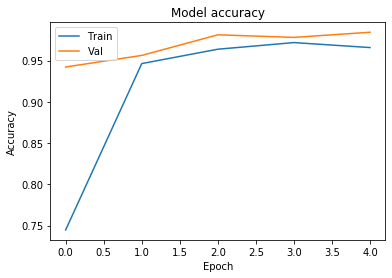

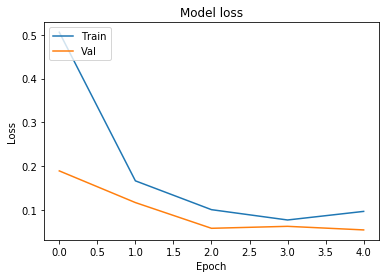

In [5]:
import matplotlib.pyplot as plt
#plot training validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot training validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [6]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 48, 48, 128)       1280      
_________________________________________________________________
activation_102 (Activation)  (None, 48, 48, 128)       0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 128)       147584    
_________________________________________________________________
activation_103 (Activation)  (None, 22, 22, 128)       0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 9, 9, 128)       